c:\Users\Compuworld\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


(17, 14)
(17, 14)
[[ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
 [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
 [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
 [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
 [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
 [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
 [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
 [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
 [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
 [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
 [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
 [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
 [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
 [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
 [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
 [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
 [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 

array([[ 8. , 12. ],
       [ 4. , 15. ],
       [ 5.5, 12. ],
       [13. , 10. ]])

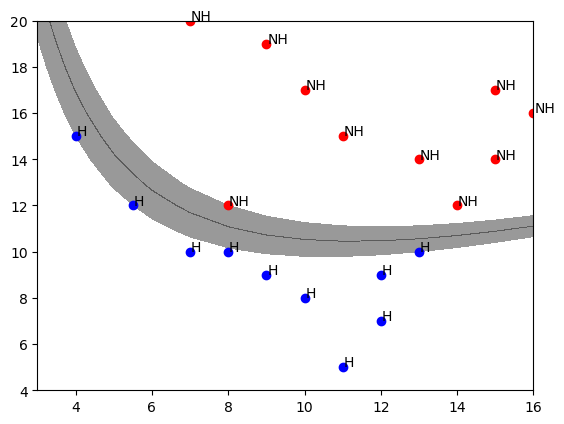

In [2]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt

# Reading in the dataset
df=pd.read_csv('SVM_Dataset2.csv')

# First feature
X1=df['x1']

# Second feature
X2=df['x2']

# Creating feature matrix from a set of two features
X_train=np.array(list(zip(X1,X2)))

# Getting labels of the features in the feature matrix
y_train=df['y'].values
# svm_classifier = svm.SVC(kernel='linear', C=10)
#svm_classifier = svm.SVC(kernel='poly', C=10)

# SVM classifier with polynomial decision boundary
svm_classifier = svm.SVC(kernel='poly',C=10, degree=2)
# svm_classifier = svm.SVC(kernel='rbf', gamma=0.1, C=100)

# Fits the dataset to the classifier
svm_classifier.fit(X_train, y_train)
color_ls = []

# Depending on labels assigns as 'b' or 'r' (blue or red) 
for k in y_train:
    if k == 1:
        color_ls.append('b')
    else:
        color_ls.append('r')
color_ls
label = []
for k in y_train:
    if k == 1:
        label.append('H')
    else:
        label.append('NH')
label

# Blue -- healthy ; red -- not healthy 

def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Min - max grid 
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))

    print(xx1.shape) 
    print(xx2.shape)
    print(xx1) 
    print(xx2)

    # Gets the function for the decision boundary
    x = np.array([xx1.ravel(), xx2.ravel()]).T
    print(x.shape)
    # Determines the distance (how negative or positive from the decision boundary)
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    # print(Z.shape)
    # print(xx1[0], xx2[0], Z[0])
    # print(xx1[1], xx2[1], Z[1])
    # print(xx1[-1], xx2[-1], Z[-1])
    # print(np.mean(Z, axis=0))
    # print(np.max(Z, axis=0))
    #print(Z[Z < 0])
    # print(np.nonzero(Z < -19))
    #m = np.nonzero(Z < -19)
    #print(Z[m])
    Q = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    print('Q')
    print(Q)
    print(Q.shape)
    print(xx1.shape)
    print(xx2.shape)
    plt.contourf(xx1, xx2, Z, colors='k', levels=[-1, 0, 1], alpha=0.4,linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
plot_decision_boundary(svm_classifier, X_train, y_train)

for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i+0.02, j+0.02, label[k])
    
svm_classifier.support_vectors_

## Decision Trajectories Steps

In [4]:
for collection in contours.collections:
    for path in collection.get_paths():
        vertices = path.vertices
        x_coords = vertices[:, 0]
        y_coords = vertices[:, 1]
        print((x_coords, y_coords))

(array([16.        , 15.        , 14.        , 13.        , 12.        ,
       11.        , 10.        ,  9.        ,  8.00114516,  8.        ,
        7.        ,  6.74717764,  6.        ,  5.93388154,  5.35636735,
        5.        ,  4.89510746,  4.53268747,  4.22376653,  4.        ,
        3.96002045,  3.7410314 ]), array([11.55888497, 11.36918012, 11.21909005, 11.1178789 , 11.07794363,
       11.11626064, 11.25671541, 11.53401547, 12.        , 12.00060363,
       12.74125717, 13.        , 13.89851449, 14.        , 15.        ,
       15.73984471, 16.        , 17.        , 18.        , 18.83086284,
       19.        , 20.        ]))
(array([16.        , 15.50553445, 15.        , 14.        , 13.        ,
       12.        , 11.        , 10.        ,  9.        ,  8.20976194,
        8.        ,  7.        ,  6.64366506,  6.        ,  5.75078663,
        5.12728088,  5.        ,  4.66281816,  4.28813442,  4.        ,
        3.9748504 ,  3.72315009,  3.50434907,  3.31255659]), arr

In [5]:
# The Blue Line
np.c_[x_coords, y_coords]

array([[16.        , 10.65211364],
       [15.        , 10.40151007],
       [14.        , 10.18168032],
       [13.00095568, 10.        ],
       [13.        ,  9.99981289],
       [12.        ,  9.86569236],
       [11.        ,  9.79226095],
       [10.        ,  9.79798716],
       [ 9.        ,  9.90967903],
       [ 8.62235606, 10.        ],
       [ 8.        , 10.16810951],
       [ 7.        , 10.63775644],
       [ 6.50152315, 11.        ],
       [ 6.        , 11.42792113],
       [ 5.51678502, 12.        ],
       [ 5.        , 12.74082392],
       [ 4.85867501, 13.        ],
       [ 4.38477366, 14.        ],
       [ 4.        , 14.99938962],
       [ 3.99980353, 15.        ],
       [ 3.70433972, 16.        ],
       [ 3.45292233, 17.        ],
       [ 3.23659562, 18.        ],
       [ 3.04867768, 19.        ],
       [ 3.        , 19.28308616]])

## Interpolation Step

- It is better to interpolate the points of decision trajectory
- As an option, we aare applying GaussianProcessRegressor for interpolation task
- Other interpolation algorithms can be investigated

In [6]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# Define the kernel
kernel = RBF(length_scale=1.0)

# Create a Gaussian Process Regressor
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit the model
gp.fit(np.c_[x_coords, y_coords][:,0].reshape(-1,1), np.c_[x_coords, y_coords][:,1])

X_pred = np.linspace(np.min(x_coords), np.max(x_coords), 1000)[:, np.newaxis]
y_pred, sigma = gp.predict(X_pred, return_std=True)

### Use Cubic Interpolation

In [89]:
from scipy.interpolate import interp1d
print(len(x_coords))
print(len(y_coords))
f = interp1d(x_coords, y_coords, kind='cubic')
X_pred = np.linspace(np.min(x_coords), np.max(x_coords), 1000)[:, np.newaxis]
Y_pred = f(X_pred)
print(X_pred.shape) 
print(y_pred.shape)

24
24
(1000, 1)
(1000,)


In [57]:
np.c_[X_pred, Y_pred].shape

(1000, 2)

In [58]:
np.c_[x_coords, y_coords].shape

(24, 2)

In [10]:
def distance_between_points(point1, point2):
    """
    Calculate the Euclidean distance between two points in 2D space.

    Parameters:
    point1 (tuple or list): The (x, y) coordinates of the first point.
    point2 (tuple or list): The (x, y) coordinates of the second point.

    Returns:
    float: The Euclidean distance between point1 and point2.
    """
    # Convert the points to numpy arrays for easier calculation
    point1 = np.array(point1)
    point2 = np.array(point2)
    
    # Calculate the Euclidean distance using numpy
    distance = np.linalg.norm(point2 - point1)
    
    return distance

In [11]:
def perpendicular_distance(x1, y1, x2, y2, x0, y0):
    """
    Calculate the perpendicular distance from a point (x0, y0) to a line
    defined by two points (x1, y1) and (x2, y2).

    Parameters:
    x1, y1 : float : coordinates of the first point defining the line
    x2, y2 : float : coordinates of the second point defining the line
    x0, y0 : float : coordinates of the point from which to measure the distance

    Returns:
    float : the perpendicular distance from the point (x0, y0) to the line
    """
    # Line equation coefficients A, B, and C
    A = y2 - y1
    B = x1 - x2
    C = x2 * y1 - x1 * y2

    # Perpendicular distance formula
    distance = abs(A * x0 + B * y0 + C) / np.sqrt(A**2 + B**2)

    return distance

(20, 2)
0.002963602216791804
4.063737867131852
0.6239659097077994
8.834214397805836
0.6122728424229681
8.76364481856287
0.6008430139163909
8.693840562340815
0.5896710374347447
8.624789864391689
0.5787516171489292
8.556481005373588
0.5680795467508846
8.488902312858679
0.557649708051506
8.422042162857196
0.5474570695772368
8.355888981357728
0.5374966851678983
8.290431245884475
0.5277636925736042
8.22565748707197
0.5182533120523242
8.161556290258089
0.5089608449670523
8.098116297096146
0.49988167238309633
8.035326207187104
0.49101125366534276
7.973174779732979
0.4823451250754718
7.911650835212707
0.4738788983696829
7.850743257081883
0.4656082593953187
7.790440993497849
0.4575289666885725
7.730733059071983
0.4496339452327782
7.671608536650944
0.4418992007159039
7.6130569565968385
0.43431325677164334
7.5550705375931875
0.42687343875777967
7.497642645351592
0.41957714108281496
7.440766671908171
0.41242179478610036
7.384436032328298
0.40540486710778445
7.328644165549142
0.39852386105894677
7.

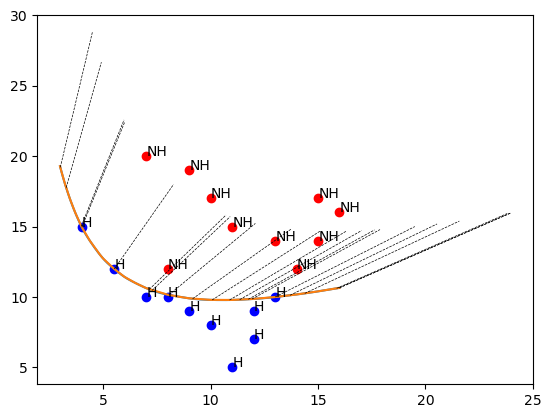

In [12]:
plt.plot(X_pred, Y_pred)
plt.plot(x_coords, y_coords)

X_vectors, Y_vectors = [], [] 
#X_pred[1:-1], y_pred[1:-1]
X_pred = X_pred.flatten() 
Y_pred = Y_pred.flatten()

print(X_train.shape)

for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i+0.02, j+0.02, label[k])


for r in range(X_train.shape[0]): 
    min_point_vector = (-1, -1)
    min_orthogonal = 1
    min_k = -1
    min_dist = float('inf')

    ortho_dists = [] 
    for k in range(1, len(X_pred)-1): 
        dist_x, dist_y = X_pred[k] - X_pred[k-1], Y_pred[k] - Y_pred[k-1]
        point_dist_x, point_dist_y = X_train[r,0] - X_pred[k-1], X_train[r,1] - Y_pred[k-1]
  

        # print(dist_x, dist_y) 
        # print(point_dist_x, point_dist_y)

        line_vector = np.array([dist_x, dist_y]).reshape((1,2))
        point_vector = np.array([point_dist_x, point_dist_y]).reshape((2,1))

        # print(line_vector) 
        # print(point_vector) 

        orthogonal = np.matmul(line_vector, point_vector) 
        abs_orthogonal = abs(orthogonal.item()) 
     #   print(abs_orthogonal)

        if abs_orthogonal < min_orthogonal: 
            min_orthogonal = abs_orthogonal
            min_point_vector = (X_pred[k-1], Y_pred[k-1]) 
            print(min_orthogonal)
            print(distance_between_points(min_point_vector, (X_train[r,0], X_train[r,1])))
            min_dist = distance_between_points(min_point_vector, (X_train[r,0], X_train[r,1]))
            min_k = k 

        ortho_dists.append(orthogonal)
        
    x_line, y_line = [X_pred[min_k], X_pred[min_k] + min_point_vector[0] * 0.5], [Y_pred[min_k], Y_pred[min_k] + min_point_vector[1] * 0.5]
    plt.plot(x_line, y_line, color='black', linestyle='--', linewidth=0.5)

In [71]:
def direction_func(data_pt, final_dist_vec, scaler, direction, x1=0): 
    if direction == "negative": 
        x1 = x1 * -1
    margin = np.array([x1, x1]) 
    modified_pt = data_pt + final_dist_vec*scaler + margin
    return modified_pt

def displacement_func(X_pred, Y_pred, data_pt, margin=0): 
    #X_pred[1:-1], y_pred[1:-1]
    X_pred = X_pred.flatten() 
    Y_pred = Y_pred.flatten()

    min_point_vector = (-1, -1)
    min_orthogonal = float('inf')

    for k in range(1, len(X_pred)-1): 
        dist_x, dist_y = X_pred[k] - X_pred[k-1], Y_pred[k] - Y_pred[k-1]
        point_dist_x, point_dist_y = X_pred[k] - data_pt[0], Y_pred[k] - data_pt[1] 
            
        line_vector = np.array([dist_x, dist_y]).T 
        point_vector = np.array([point_dist_x, point_dist_y]) 

        orthogonal = np.matmul(line_vector, point_vector) 
        abs_orthogonal = abs(orthogonal) 
        
        if abs_orthogonal < min_orthogonal: 
            min_orthogonal = abs_orthogonal
            min_point_vector = (X_pred[k-1], Y_pred[k-1]) 
        
    # This is a vector that points towards the decision boundary from data point
    min_point_vector = np.array([min_point_vector[0], min_point_vector[1]]) 
    np_data_pt = np.array([data_pt[0], data_pt[1]]) 

    final_dist_vector = min_point_vector - np_data_pt
    # magnitude = np.linalg.norm(final_dist_vector) 
    np_data_pt_reshaped = np_data_pt.reshape(1, -1)  
    # norm_vector = final_dist_vector / magnitude 
    Z = svm_classifier.decision_function(np_data_pt_reshaped)
    if Z[0] < 0: 
        modified_pt = direction_func(np_data_pt, final_dist_vector, 1, 'negative', x1=margin)
    else: 
        modified_pt = direction_func(np_data_pt, final_dist_vector, 1, 'positive', x1=margin)

    modified_pt = np.array([modified_pt[0], modified_pt[1]])
    modified_pt = modified_pt.reshape(1, -1)   

    ZMOD = svm_classifier.decision_function(modified_pt)

    print(Z[0]) 
    print(ZMOD[0])

    return modified_pt

displacement_func(X_pred, Y_pred, X_train[5])

-6.1439539561284136
-0.0011432172097016746


array([[13.45997129, 10.61832859]])

C:\Users\Compuworld\AppData\Local\Temp\ipykernel_27260\2905285397.py:6: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  yprime = derivative(f, x2, dx=1e-6)


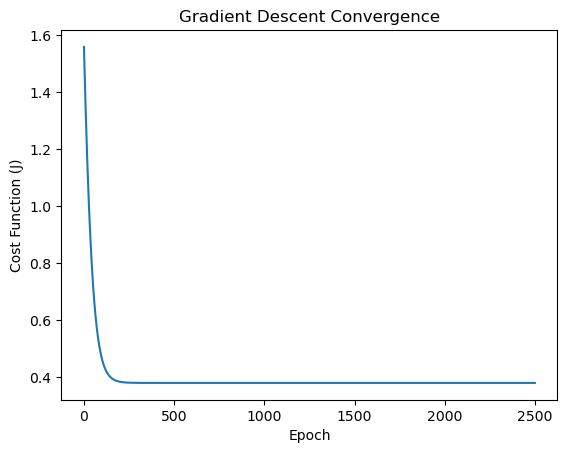

1.5824544097811102
4.574690324151918


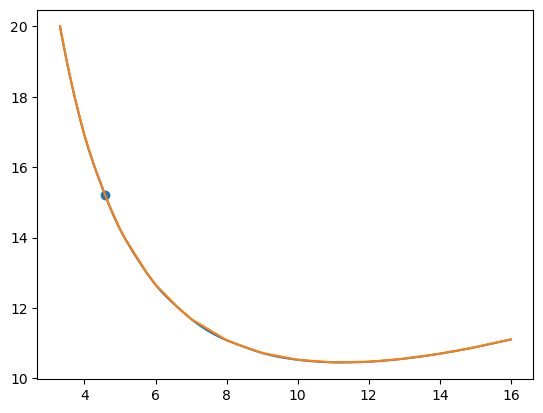

In [85]:
from scipy.misc import derivative

r = 10

def dx(x1, y1, x2): 
    yprime = derivative(f, x2, dx=1e-6)
    return 2*(x2-x1) + 2*yprime*(f(x2)-y1)

def J(x1, x2, y1): 
    return (x2-x1)**2 + (f(x2)-y1)**2

def gradient_descent(x1, x2, y1): 
    epochs = 2500
    lr = 0.001 

    J_values = [] 
    epochs_list = [] 

    for epoch in range(epochs): 
        x2 = x2 - lr * dx(x1, y1, x2)
        valueOfJ = J(x1, x2, y1)
        J_values.append(valueOfJ)
        epochs_list.append(epoch) 

    plt.plot(epochs_list, J_values)
    plt.xlabel('Epoch')
    plt.ylabel('Cost Function (J)')
    plt.title('Gradient Descent Convergence')
    plt.show()

    return x2
X_vectors, Y_vectors = [], [] 
#X_pred[1:-1], y_pred[1:-1]
X_pred = X_pred.flatten() 
Y_pred = Y_pred.flatten()

x_final, y_final = None, None


min_point_vector = (-1, -1)
min_orthogonal = 1

x2 = gradient_descent(X_train[r,0], 5, X_train[r,1])
print(J(X_train[r,0], 5, X_train[r,1]))
print(x2)
x_final = x2
y_final = f(x2) 
    

plt.plot(X_pred, Y_pred)
plt.plot(x_coords, y_coords)
plt.scatter(x_final, y_final)

4.574690324151918
15.223220024314642


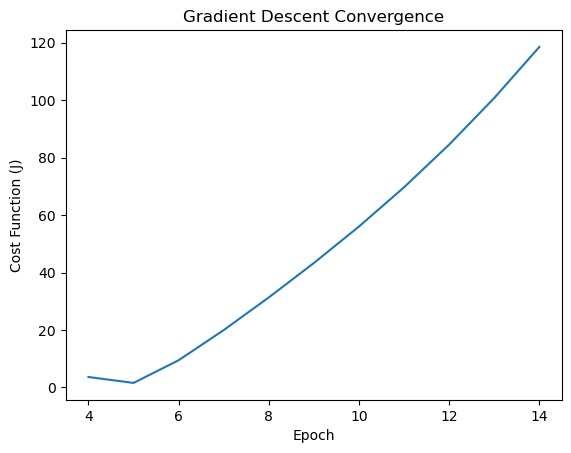

In [87]:
x_list = []

for x in range(4, 15): 
    x_list.append(x) 

Jvalues = [] 
print(x_final) 
print(y_final)
for x in x_list: 
    J_val = J(X_train[r,0], float(x), X_train[r,1])
    Jvalues.append(J_val) 


plt.plot(x_list, Jvalues)
plt.xlabel('Epoch')
plt.ylabel('Cost Function (J)')
plt.title('Gradient Descent Convergence')
plt.show()
    

In [88]:
modified_pt = displacement_func(X_pred, Y_pred, X_train[10], margin=0)
print(modified_pt)
print(x_final, y_final)

0.9996782991356241
-0.018573222282768143
[[ 4.55717066 15.26847047]]
4.574690324151918 15.223220024314642


## Projection Step

In [291]:
from scipy.spatial import KDTree

# Function to reflect a point across the contour
def reflect_point(point, contour):
    tree = KDTree(contour)
    closest_index = tree.query(point)[1]
    closest_point = contour[closest_index]
    reflected_point = closest_point + (closest_point - point)
    return reflected_point

In [301]:
contour_points = np.c_[X_pred, y_pred]

In [302]:
contour_points.shape

(1000, 2)

In [297]:
# Reflect points
reflected_points = np.array([reflect_point(point, contour_points) for point in X_train])

In [298]:
reflected_points.shape

(20, 2)

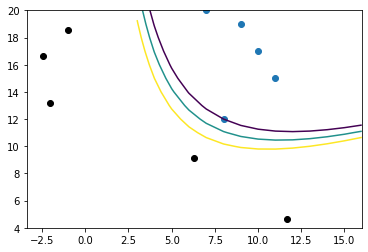

In [299]:
plt.scatter(reflected_points[:,0][0:5], reflected_points[:,1][0:5], color = 'k')
plt.scatter(X_train[:,0][0:5], X_train[:,1][0:5])
plt.contour(xx1, xx2, Z, levels=[-1, 0, 1])

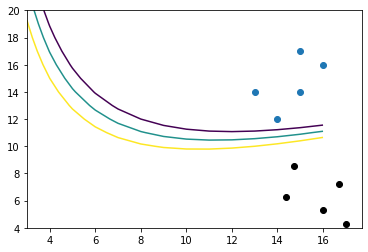

In [300]:
plt.scatter(reflected_points[:,0][5:10], reflected_points[:,1][5:10], color = 'k')
plt.scatter(X_train[:,0][5:10], X_train[:,1][5:10])
plt.contour(xx1, xx2, Z, levels=[-1, 0, 1])

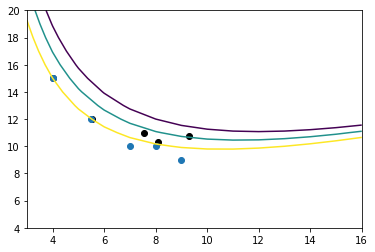

In [286]:
plt.scatter(reflected_points[:,0][10:15], reflected_points[:,1][10:15], color = 'k')
plt.scatter(X_train[:,0][10:15], X_train[:,1][10:15])
plt.contour(xx1, xx2, Z, levels=[-1, 0, 1])

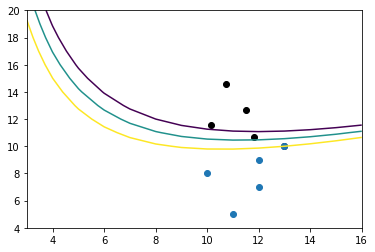

In [268]:
plt.scatter(reflected_points[:,0][15:20], reflected_points[:,1][15:20], color = 'k')
plt.scatter(X_train[:,0][15:20], X_train[:,1][15:20])
plt.contour(xx1, xx2, Z, levels=[-1, 0, 1])

## Another function for reflection

In [269]:
# Define a function to compute the Euclidean distance between two points
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Define a function to project a point onto a trajectory (find the closest point)
def project_point_onto_trajectory(point, trajectory):
    # Compute the distance between the point and all points on the trajectory
    distances = np.array([euclidean_distance(point, p) for p in trajectory])
    
    # Find the index of the closest point on the trajectory
    closest_index = np.argmin(distances)
    
    # Return the closest point (projection)
    return trajectory[closest_index]

# Define a function to reflect a point across its projection on a trajectory
def reflect_point_across_trajectory(point, trajectory):
    # Find the closest point on the trajectory (projection)
    projection = project_point_onto_trajectory(point, trajectory)
    
    # Calculate the reflection of the point across the projection
    reflection = 2 * projection - point
    
    return reflection

reflected_points_class_new = np.array([reflect_point_across_trajectory(point, contour_points) for point, classof in zip(X_train, y_train) if classof == -1])

In [270]:
reflected_points_class_new.shape

(10, 2)

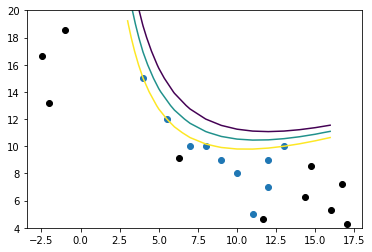

In [271]:
plt.scatter(reflected_points_class_new[:,0], reflected_points_class_new[:,1], color = 'k')
plt.scatter(X_train[y_train == 1][:,0], X_train[y_train == 1][:,1])
plt.contour(xx1, xx2, Z, levels=[-1, 0, 1])

## Consider class for projection

In [272]:
# Reflect points
reflected_points_class = np.array([reflect_point(point, contour_points) for point, classof in zip(X_train, y_train) if classof == -1])

In [273]:
reflected_points_class.shape

(10, 2)

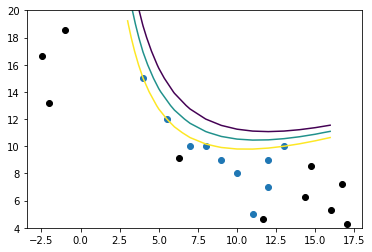

In [274]:
plt.scatter(reflected_points_class[:,0], reflected_points_class[:,1], color = 'k')
plt.scatter(X_train[y_train == 1][:,0], X_train[y_train == 1][:,1])
plt.contour(xx1, xx2, Z, levels=[-1, 0, 1])

In [275]:
X_train.shape

(20, 2)

## Optimal Personalized Treatment Plan:

For continuous features without constraint:

	- The average of original point and orthogonal projected point is the optimal solution

For continuous features with defining maximum possible changes as constraints (for example x2 can be changed only by 20%):

	- It is possible that for some counterfactual samples, the optimal solution would be infeasible
	- However, we can provide better movement for those infeasible point
	- For better movement of infeasible points should move to the direction of a line that connect the original point to a nearest or near points on the decision trajectory 	 

For having both categorical and numerical features:

	- If we have C categorical features that can not be changes and N features in total, the search space would be N-C

## Close work to this Geometric idea

- Check Counterfactual Explanation

-DiCE: https://github.com/interpretml/DiCE/blob/main/docs/source/notebooks/DiCE_getting_started.ipynb
